In [2]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 40.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 76.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 59.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 41.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 762.9 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 89.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

In [3]:
from ultralytics import YOLO

model = YOLO("best.pt")

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


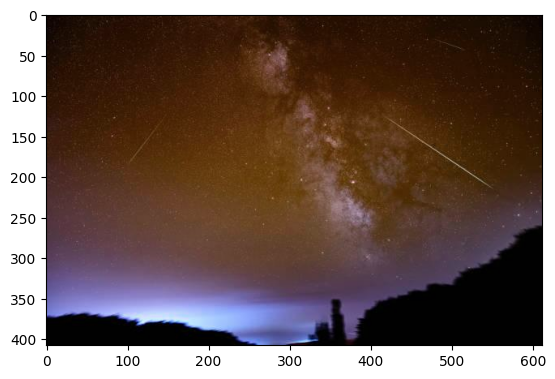

In [56]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

img = cv2.imread("ISTOCK~3.JPG")
# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()


0: 448x640 (no detections), 175.8ms
Speed: 5.9ms preprocess, 175.8ms inference, 0.7ms postprocess per image at shape (1, 3, 448, 640)


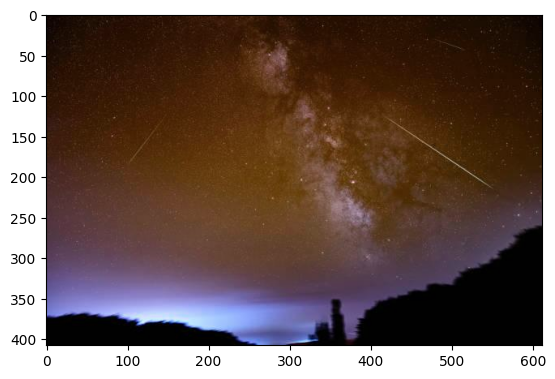

In [57]:
# img = cv2.imread("AAL_20200403092122NE2x6_frame_4_pos.jpg")
# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
results = model(img)
# The render() method does not exist. Use plot() to visualize the results on the image.
# Call plot() on the results object to get the image with bounding boxes
plt.imshow(np.squeeze(results[0].plot()))
plt.show()

In [58]:
cv2.imwrite('unsuccessful image 8.jpg', np.squeeze(results[0].plot()))

True

In [64]:
os.listdir("/content")
imgs =[]
for img in os.listdir("/content"):
  if img.endswith(".jpg"):
    imgs.append(cv2.imread(img))

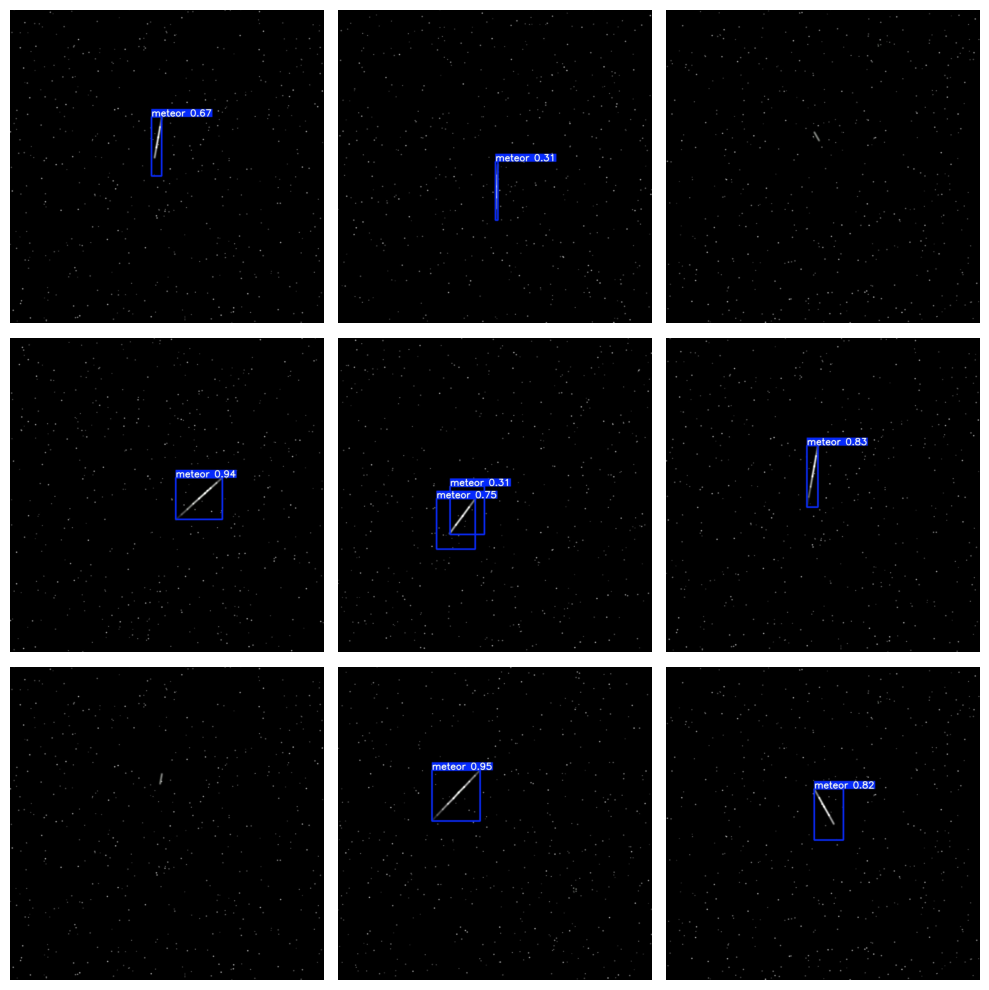

In [65]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(3, 3, figsize=(10, 10))
axes = axes.ravel()

for i, img in enumerate(imgs):
    if i < len(axes):
        axes[i].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        axes[i].axis('off')

plt.tight_layout()
plt.show()

In [66]:
# prompt: save the plot in image

import matplotlib.pyplot as plt
plt.savefig('my_plot.png')

<Figure size 640x480 with 0 Axes>

In [ ]:
results = []
for img in os.listdir("/content/Test Data/Meteor Shower Detection.v1i.yolov8/valid/images"):
  # Ensure the image is not None (imread might fail)
  img_path = f"/content/Test Data/Meteor Shower Detection.v1i.yolov8/valid/images/{img}"
  img = cv2.imread(img_path)
  if img is not None:
    results.append(model(img))
  else:
    print(f"Warning: Could not read image at {img_path}")


# Iterate through the indices of the results list
for i in range(len(results)):
  # Create the output directory if it doesn't exist
  output_dir = "yolo_test"
  os.makedirs(output_dir, exist_ok=True)
  # Construct the output filename
  output_filename = os.path.join(output_dir, f"{i}.jpg") # Use .jpg extension
  # Plot the results and save the image
  # Access the Results object at index 0 within the list returned by model(img)
  cv2.imwrite(output_filename, np.squeeze(img.plot()))


0: 448x640 1 meteor, 166.6ms
Speed: 5.4ms preprocess, 166.6ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)

0: 448x640 (no detections), 162.1ms
Speed: 4.0ms preprocess, 162.1ms inference, 0.6ms postprocess per image at shape (1, 3, 448, 640)

0: 448x640 (no detections), 177.1ms
Speed: 4.2ms preprocess, 177.1ms inference, 0.7ms postprocess per image at shape (1, 3, 448, 640)

0: 448x640 (no detections), 165.8ms
Speed: 3.9ms preprocess, 165.8ms inference, 0.7ms postprocess per image at shape (1, 3, 448, 640)

0: 448x640 (no detections), 163.5ms
Speed: 3.7ms preprocess, 163.5ms inference, 0.6ms postprocess per image at shape (1, 3, 448, 640)

0: 640x640 (no detections), 235.4ms
Speed: 5.4ms preprocess, 235.4ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 448x640 (no detections), 161.3ms
Speed: 3.9ms preprocess, 161.3ms inference, 0.6ms postprocess per image at shape (1, 3, 448, 640)

0: 640x480 (no detections), 198.5ms
Speed: 4.5ms preprocess, 

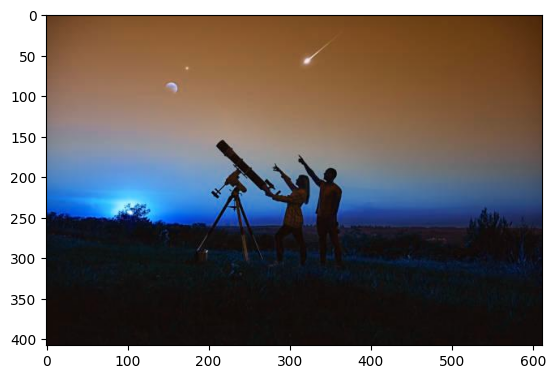

In [ ]:
plt.imshow(np.squeeze(results[2][0].plot()))
plt.show()

In [ ]:
test_yaml_path = '/content/Test Data/Meteor Shower Detection.v1i.yolov8/data.yaml'
model = YOLO('best.pt')

results = model.train(
    data=test_yaml_path,
    project='yolo_validation_runs',
)

Ultralytics 8.3.154 🚀 Python-3.11.13 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Test Data/Meteor Shower Detection.v1i.yolov8/data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=best.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plot

RuntimeError: Dataset '/content/Test Data/Meteor Shower Detection.v1i.yolov8/data.yaml' error ❌ Dataset '/content/Test Data/Meteor Shower Detection.v1i.yolov8/data.yaml' images not found, missing path '/content/Test Data/Meteor Shower Detection.v1i.yolov8/valid/images'
Note dataset download directory is '/content/datasets'. You can update this in '/root/.config/Ultralytics/settings.json'

In [ ]:
type(results)

ultralytics.utils.metrics.DetMetrics

In [43]:
import zipfile

zipfile.ZipFile('yolo_validation_runs.zip', 'w', zipfile.ZIP_DEFLATED).write('yolo_validation_runs', compress_type=zipfile.ZIP_DEFLATED)